### **Trabalho de Conclusão de Curso em Ciência de Dados - TCC530 - Turma 005 - Tcc**
#### **Desenvolvimento de Sistema de Coleta, Processamento e Análise de Dados de Evasão dos Cursos de Graduação no Estado de São Paulo**

#### Integrantes
Ana Beatriz Augusto De Melo Da Silva, 2004708  
Cristiane Harsche Simoes, 1400549  
Jorge Gomes Da Silva Filho, 1401365  
Jose Hamilton Firmo, 2006390  
Jucelino Santos Silva, 2005718  
Luciene Godoy Da Silva, 2015951  
Marcos Pereira Da Silva Cruz, 2000561  
Michel Silva De Souza, 2003134  

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import glob
import torch.optim as optim
import torch
import torch.nn as nn

### Análise descritiva de dados (ADD) | Censo da Educação Superior de 2.010 até 2.021.

Fonte: <https://www.gov.br/inep/pt-br/areas-de-atuacao/pesquisas-estatisticas-e-indicadores/censo-da-educacao-superior/resultados>

In [2]:
#Definição da exibição da saída
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 300)

#### Merge dos Microdados

In [3]:
"""
# Merge dados INEP
df = pd.concat(map(pd.read_excel, glob.glob(
    r'/home/jsfilho/Documentos/UNIVESP/Ciências de dados/Ciclo Profissional/TCC/Analise1/dataset/Merge/*.xlsx')))

# Selecionar colunas antes de agrupar
# SelecionarColunas = df[['Código da Instituição', 'Nome da Instituição', 'Categoria Administrativa', 'Organização Acadêmica', 'Código do Curso de Graduação', 'Nome do Curso de Graduação', 'Código da Região Geográfica do Curso', 'Código da Unidade Federativa do Curso', 'Código do Município do Curso', 'Grau Acadêmico', 'Modalidade de Ensino', 'Código da área do Curso segundo a classificação CINE BRASIL', 'Nome da área do Curso segundo a classificação CINE BRASIL', 'Código da Grande Área do Curso segundo a classificação CINE BRASIL', 'Nome da Grande Área do Curso segundo a classificação CINE BRASIL', 'Ano de Ingresso',
#                        'Ano de Referência', 'Prazo de Integralização em Anos', 'Ano de Integralização do Curso', 'Prazo de Acompanhamento do Curso em anos', 'Ano Máximo de Acompanhamento do Curso', 'Quantidade de Ingressantes no Curso', 'Quantidade de Permanência no Curso no ano de referência', 'Quantidade de Concluintes no Curso no ano de referência', 'Quantidade de Desistência no Curso no ano de referência', 'Quantidade de Falecimentos no Curso no ano de referência', 'Taxa de Permanência - TAP', 'Taxa de Conclusão Acumulada - TCA', 'Taxa de Desistência Acumulada - TDA', 'Taxa de Conclusão Anual - TCAN', 'Taxa de Desistência Anual - TADA']]

# Remover valores duplicados
DadosAgrupados = df.drop_duplicates()


Data = datetime.now().strftime('%Y%m%d')

# Exportar dataset
DadosAgrupados.to_csv(r'/home/jsfilho/Documentos/UNIVESP/Ciências de dados/Ciclo Profissional/TCC/Analise1/dataset/Merge/' +
                      Data + '_DadosINEP_TES.csv', encoding='utf-8', index=False)
"""                      

"\n# Merge dados INEP\ndf = pd.concat(map(pd.read_excel, glob.glob(\n    r'/home/jsfilho/Documentos/UNIVESP/Ciências de dados/Ciclo Profissional/TCC/Analise1/dataset/Merge/*.xlsx')))\n\n# Selecionar colunas antes de agrupar\n# SelecionarColunas = df[['Código da Instituição', 'Nome da Instituição', 'Categoria Administrativa', 'Organização Acadêmica', 'Código do Curso de Graduação', 'Nome do Curso de Graduação', 'Código da Região Geográfica do Curso', 'Código da Unidade Federativa do Curso', 'Código do Município do Curso', 'Grau Acadêmico', 'Modalidade de Ensino', 'Código da área do Curso segundo a classificação CINE BRASIL', 'Nome da área do Curso segundo a classificação CINE BRASIL', 'Código da Grande Área do Curso segundo a classificação CINE BRASIL', 'Nome da Grande Área do Curso segundo a classificação CINE BRASIL', 'Ano de Ingresso',\n#                        'Ano de Referência', 'Prazo de Integralização em Anos', 'Ano de Integralização do Curso', 'Prazo de Acompanhamento do Curso 

In [3]:
#carregando os microdados do INEP no dataframe
df1 = pd.read_csv('20230809_DadosINEP_TES.csv', encoding='utf-8')

In [4]:
display(df1)

,Código da Instituição,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Código do Curso de Graduação,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,Código da área do Curso segundo a classificação CINE BRASIL,Nome da área do Curso segundo a classificação CINE BRASIL,Código da Grande Área do Curso segundo a classificação CINE BRASIL,Nome da Grande Área do Curso segundo a classificação CINE BRASIL,Ano de Ingresso,Ano de Referência,Prazo de Integralização em Anos,Ano de Integralização do Curso,Prazo de Acompanhamento do Curso em anos,Ano Máximo de Acompanhamento do Curso,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual,Taxa de Desistência Acumulada
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2010,2010,6,2015,10,2019,107,98,1,8,0,91.588785,0.934579,0.934579,7.476636,7.476636
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2010,2011,6,2015,10,2019,107,90,0,8,0,84.112150,0.934579,0.000000,7.476636,14.953271
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2010,2012,6,2015,10,2019,107,87,2,1,0,81.308411,2.803738,1.869159,0.934579,15.887850
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2010,2013,6,2015,10,2019,107,83,2,2,0,77.570093,4.672897,1.869159,1.869159,17.757009
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,1,DIREITO,5.0,51.0,5103403.0,1,1,0421D01,Direito,4,"Negócios, administração e direito",2010,2014,6,2015,10,2019,107,27,54,2,0,25.233645,55.140187,50.467290,1.869159,19.626168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773514,25352,Universidade Federal de Rondonópolis,1,1,1261971,MEDICINA,5.0,51.0,5107602.0,1,1,0912M01,Medicina,9,Saúde e bem-estar,2017,2017,7,2023,10,2026,41,40,0,1,0,97.560976,0.000000,0.000000,2.439024,2.439024
1773515,25352,Universidade Federal de Rondonópolis,1,1,1261971,MEDICINA,5.0,51.0,5107602.0,1,1,0912M01,Medicina,9,Saúde e bem-estar,2017,2018,7,2023,10,2026,41,39,0,1,0,95.121951,0.000000,0.000000,2.439024,4.878049
1773516,25352,Universidade Federal de Rondonópolis,1,1,1261971,MEDICINA,5.0,51.0,5107602.0,1,1,0912M01,Medicina,9,Saúde e bem-estar,2017,2019,7,2023,10,2026,41,36,0,3,0,87.804878,0.000000,0.000000,7.317073,12.195122
1773517,25352,Universidade Federal de Rondonópolis,1,1,1261971,MEDICINA,5.0,51.0,5107602.0,1,1,0912M01,Medicina,9,Saúde e bem-estar,2017,2020,7,2023,10,2026,41,35,0,1,0,85.365854,0.000000,0.000000,2.439024,14.634146


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773519 entries, 0 to 1773518
Data columns (total 31 columns):
 #   Column                                                              Dtype  
---  ------                                                              -----  
 0   Código da Instituição                                               int64  
 1   Nome da Instituição                                                 object 
 2   Categoria Administrativa                                            int64  
 3   Organização Acadêmica                                               int64  
 4   Código do Curso de Graduação                                        int64  
 5   Nome do Curso de Graduação                                          object 
 6   Código da Região Geográfica do Curso                                float64
 7   Código da Unidade Federativa do Curso                               float64
 8   Código do Município do Curso                                        floa

In [6]:
for col in df1.columns:
    print(col)

Código da Instituição
Nome da Instituição
Categoria Administrativa
Organização Acadêmica
Código do Curso de Graduação
Nome do Curso de Graduação
Código da Região Geográfica do Curso
Código da Unidade Federativa do Curso
Código do Município do Curso
Grau Acadêmico
Modalidade de Ensino
Código da área do Curso segundo a classificação CINE BRASIL
Nome da área do Curso segundo a classificação CINE BRASIL
Código da Grande Área do Curso segundo a classificação CINE BRASIL
Nome da Grande Área do Curso segundo a classificação CINE BRASIL
Ano de Ingresso
Ano de Referência
Prazo de Integralização em Anos
Ano de Integralização do Curso
Prazo de Acompanhamento do Curso em anos
Ano Máximo de Acompanhamento do Curso
Quantidade de Ingressantes no Curso
Quantidade de Permanência no Curso no ano de referência
Quantidade de Concluintes no Curso no ano de referência
Quantidade de Desistência no Curso no ano de referência
Quantidade de Falecimentos no Curso no ano de referência
Taxa de Permanência - TAP
Ta

In [7]:
df1["Ano de Referência"].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021])

In [8]:
# remover as colunas não necessárias
df_cursos = df1.drop(columns=["Código da Instituição",
                              "Código do Curso de Graduação",
                              "Código da área do Curso segundo a classificação CINE BRASIL",
                              "Código da Grande Área do Curso segundo a classificação CINE BRASIL"])

# Somente os indicadores de trajetória
df_taxas = df1.drop(columns=["Código da Instituição",
                             "Nome da Instituição",
                             "Categoria Administrativa",
                             "Organização Acadêmica",
                             "Código do Curso de Graduação",
                             "Nome do Curso de Graduação",
                             "Código da Região Geográfica do Curso",
                             "Código da Unidade Federativa do Curso",
                             "Código do Município do Curso",
                             "Grau Acadêmico",
                             "Modalidade de Ensino",
                             "Código da área do Curso segundo a classificação CINE BRASIL",
                             "Nome da área do Curso segundo a classificação CINE BRASIL",
                             "Código da Grande Área do Curso segundo a classificação CINE BRASIL",
                             "Nome da Grande Área do Curso segundo a classificação CINE BRASIL",
                             "Ano de Ingresso",
                             "Ano de Referência",
                             "Prazo de Integralização em Anos",
                             "Ano de Integralização do Curso",
                             "Prazo de Acompanhamento do Curso em anos",
                             "Ano Máximo de Acompanhamento do Curso"])

In [9]:
df_cursos["Nome da área do Curso segundo a classificação CINE BRASIL"].unique()

array(['Direito', 'Economia', 'Engenharia civil', 'Pedagogia',
       'Serviço social', 'Contabilidade', 'Agronomia',
       'Engenharia florestal', 'Medicina', 'Administração', 'Geologia',
       'Engenharia elétrica', 'Enfermagem',
       'Educação física formação de professor', 'Nutrição',
       'Geografia formação de professor',
       'História formação de professor',
       'Matemática formação de professor', 'Física formação de professor',
       'Biologia formação de professor', 'Ciência da computação',
       'Medicina veterinária', 'Arquitetura e urbanismo', 'Farmácia',
       'Letras português inglês formação de professor',
       'Letras português formação de professor',
       'Letras português francês formação de professor',
       'Letras português espanhol formação de professor',
       'Rádio, TV e internet', 'Biblioteconomia',
       'Computação formação de professor', 'Zootecnia', 'Jornalismo',
       'Publicidade e propaganda', 'Psicologia',
       'Música formação

In [10]:
df_cursos["Nome da Grande Área do Curso segundo a classificação CINE BRASIL"].unique()

array(['Negócios, administração e direito',
       'Ciências sociais, comunicação e informação',
       'Engenharia, produção e construção', 'Educação',
       'Saúde e bem-estar',
       'Agricultura, silvicultura, pesca e veterinária',
       'Ciências naturais, matemática e estatística',
       'Computação e Tecnologias da Informação e Comunicação (TIC)',
       'Artes e humanidades', 'Serviços'], dtype=object)

In [55]:
for colcursos in df_cursos.columns:
    print(colcursos)

Nome da Instituição
Categoria Administrativa
Organização Acadêmica
Nome do Curso de Graduação
Código da Região Geográfica do Curso
Código da Unidade Federativa do Curso
Código do Município do Curso
Grau Acadêmico
Modalidade de Ensino
Nome da área do Curso segundo a classificação CINE BRASIL
Nome da Grande Área do Curso segundo a classificação CINE BRASIL
Ano de Ingresso
Ano de Referência
Prazo de Integralização em Anos
Ano de Integralização do Curso
Prazo de Acompanhamento do Curso em anos
Ano Máximo de Acompanhamento do Curso
Quantidade de Ingressantes no Curso
Quantidade de Permanência no Curso no ano de referência
Quantidade de Concluintes no Curso no ano de referência
Quantidade de Desistência no Curso no ano de referência
Quantidade de Falecimentos no Curso no ano de referência
Taxa de Permanência - TAP
Taxa de Conclusão Acumulada - TCA
Taxa de Conclusão Anual - TCAN
Taxa de Desistência Anual
Taxa de Desistência Acumulada


In [11]:
display(df_cursos)

,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,Nome da área do Curso segundo a classificação CINE BRASIL,Nome da Grande Área do Curso segundo a classificação CINE BRASIL,Ano de Ingresso,Ano de Referência,Prazo de Integralização em Anos,Ano de Integralização do Curso,Prazo de Acompanhamento do Curso em anos,Ano Máximo de Acompanhamento do Curso,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual,Taxa de Desistência Acumulada
0,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,DIREITO,5.0,51.0,5103403.0,1,1,Direito,"Negócios, administração e direito",2010,2010,6,2015,10,2019,107,98,1,8,0,91.588785,0.934579,0.934579,7.476636,7.476636
1,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,DIREITO,5.0,51.0,5103403.0,1,1,Direito,"Negócios, administração e direito",2010,2011,6,2015,10,2019,107,90,0,8,0,84.112150,0.934579,0.000000,7.476636,14.953271
2,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,DIREITO,5.0,51.0,5103403.0,1,1,Direito,"Negócios, administração e direito",2010,2012,6,2015,10,2019,107,87,2,1,0,81.308411,2.803738,1.869159,0.934579,15.887850
3,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,DIREITO,5.0,51.0,5103403.0,1,1,Direito,"Negócios, administração e direito",2010,2013,6,2015,10,2019,107,83,2,2,0,77.570093,4.672897,1.869159,1.869159,17.757009
4,UNIVERSIDADE FEDERAL DE MATO GROSSO,1,1,DIREITO,5.0,51.0,5103403.0,1,1,Direito,"Negócios, administração e direito",2010,2014,6,2015,10,2019,107,27,54,2,0,25.233645,55.140187,50.467290,1.869159,19.626168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773514,Universidade Federal de Rondonópolis,1,1,MEDICINA,5.0,51.0,5107602.0,1,1,Medicina,Saúde e bem-estar,2017,2017,7,2023,10,2026,41,40,0,1,0,97.560976,0.000000,0.000000,2.439024,2.439024
1773515,Universidade Federal de Rondonópolis,1,1,MEDICINA,5.0,51.0,5107602.0,1,1,Medicina,Saúde e bem-estar,2017,2018,7,2023,10,2026,41,39,0,1,0,95.121951,0.000000,0.000000,2.439024,4.878049
1773516,Universidade Federal de Rondonópolis,1,1,MEDICINA,5.0,51.0,5107602.0,1,1,Medicina,Saúde e bem-estar,2017,2019,7,2023,10,2026,41,36,0,3,0,87.804878,0.000000,0.000000,7.317073,12.195122
1773517,Universidade Federal de Rondonópolis,1,1,MEDICINA,5.0,51.0,5107602.0,1,1,Medicina,Saúde e bem-estar,2017,2020,7,2023,10,2026,41,35,0,1,0,85.365854,0.000000,0.000000,2.439024,14.634146


In [12]:
# Principais estatísticas da base de dados
df_detalhes = df_cursos.describe()

display(df_detalhes)

,Categoria Administrativa,Organização Acadêmica,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,Ano de Ingresso,Ano de Referência,Prazo de Integralização em Anos,Ano de Integralização do Curso,Prazo de Acompanhamento do Curso em anos,Ano Máximo de Acompanhamento do Curso,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual,Taxa de Desistência Acumulada
count,1.773519e+06,1.773519e+06,1.710102e+06,1.710102e+06,1.710102e+06,1.773519e+06,1.773519e+06,1.773519e+06,1.773519e+06,1.773519e+06,1.773519e+06,1.773519e+06,1.773519e+06,1.773519e+06,1.773519e+06,1.773519e+06,1.773519e+06,1.773519e+06,1.773519e+06,1.773519e+06,1.773519e+06,1.773519e+06,1.773519e+06
mean,3.550273e+00,1.854015e+00,3.055099e+00,3.405634e+01,3.423911e+06,1.573610e+00,1.035758e+00,2.013108e+03,2.016835e+03,4.974469e+00,2.017083e+03,7.945065e+00,2.020053e+03,1.062793e+02,3.632033e+01,4.840624e+00,7.740926e+00,5.318804e-03,3.477203e+01,2.208659e+01,4.654803e+00,7.036418e+00,4.314138e+01
std,1.513441e+00,9.310407e-01,1.007679e+00,9.217092e+00,9.223270e+05,7.777658e-01,1.856856e-01,2.211912e+00,2.843800e+00,1.075501e+00,2.498918e+00,1.858820e+00,2.935451e+00,3.916252e+02,1.689951e+02,4.093202e+01,5.021196e+01,8.059796e-02,3.518604e+01,2.377588e+01,1.024844e+01,1.109459e+01,2.608414e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01,1.100023e+06,1.000000e+00,1.000000e+00,2.010000e+03,2.010000e+03,1.000000e+00,2.010000e+03,2.000000e+00,2.011000e+03,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00,2.000000e+00,2.900000e+01,2.931350e+06,1.000000e+00,1.000000e+00,2.011000e+03,2.015000e+03,5.000000e+00,2.015000e+03,8.000000e+00,2.018000e+03,3.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.162791e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.272727e+01
50%,4.000000e+00,2.000000e+00,3.000000e+00,3.500000e+01,3.510609e+06,1.000000e+00,1.000000e+00,2.013000e+03,2.017000e+03,5.000000e+00,2.017000e+03,8.000000e+00,2.020000e+03,5.800000e+01,1.100000e+01,0.000000e+00,2.000000e+00,0.000000e+00,2.105263e+01,1.475410e+01,0.000000e+00,2.777778e+00,4.285714e+01
75%,5.000000e+00,3.000000e+00,4.000000e+00,4.100000e+01,4.107207e+06,2.000000e+00,1.000000e+00,2.015000e+03,2.019000e+03,6.000000e+00,2.019000e+03,1.000000e+01,2.022000e+03,1.040000e+02,3.900000e+01,3.000000e+00,7.000000e+00,0.000000e+00,6.727273e+01,3.928571e+01,4.081633e+00,9.722222e+00,6.153846e+01
max,7.000000e+00,5.000000e+00,5.000000e+00,5.300000e+01,5.300108e+06,3.000000e+00,2.000000e+00,2.017000e+03,2.021000e+03,1.000000e+01,2.026000e+03,1.000000e+01,2.026000e+03,3.557900e+04,2.690700e+04,1.095700e+04,1.530900e+04,1.400000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02


### Pré-processamento: tratamento de dados inconsistentes ou redundantes

In [13]:
df_duplicates = df_cursos[df_cursos.duplicated(keep=False)]

# se houver valores redundantes ou inconsistentes, imprima
if len(df_duplicates) > 0:
    print('\nAmostras redundantes ou inconsistentes:')
    display(df_duplicates)
else:
    print('Não existem valores duplicados')


Amostras redundantes ou inconsistentes:


,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,Nome da área do Curso segundo a classificação CINE BRASIL,Nome da Grande Área do Curso segundo a classificação CINE BRASIL,Ano de Ingresso,Ano de Referência,Prazo de Integralização em Anos,Ano de Integralização do Curso,Prazo de Acompanhamento do Curso em anos,Ano Máximo de Acompanhamento do Curso,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual,Taxa de Desistência Acumulada
84870,UNIVERSIDADE ANHANGUERA DE SÃO PAULO,4,1,CIÊNCIAS CONTÁBEIS,3.0,35.0,3550308.0,1,1,Contabilidade,"Negócios, administração e direito",2010,2010,5,2014,8,2017,23,23,0,0,0,100.0,0.0,0.0,0.0,0.0
85260,UNIVERSIDADE ANHANGUERA DE SÃO PAULO,4,1,CIÊNCIAS CONTÁBEIS,3.0,35.0,3550308.0,1,1,Contabilidade,"Negócios, administração e direito",2010,2010,5,2014,8,2017,23,23,0,0,0,100.0,0.0,0.0,0.0,0.0
95030,CENTRO UNIVERSITÁRIO BRAZ CUBAS,4,2,PEDAGOGIA,3.0,35.0,3530607.0,2,1,Pedagogia,Educação,2010,2010,4,2013,6,2015,10,4,6,0,0,40.0,60.0,60.0,0.0,0.0
95031,CENTRO UNIVERSITÁRIO BRAZ CUBAS,4,2,PEDAGOGIA,3.0,35.0,3530607.0,2,1,Pedagogia,Educação,2010,2011,4,2013,6,2015,10,0,0,4,0,0.0,60.0,0.0,40.0,40.0
95032,CENTRO UNIVERSITÁRIO BRAZ CUBAS,4,2,PEDAGOGIA,3.0,35.0,3530607.0,2,1,Pedagogia,Educação,2010,2012,4,2013,6,2015,10,0,0,0,0,0.0,60.0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650966,UNIVERSIDADE PAULISTA,4,1,AUTOMAÇÃO INDUSTRIAL,3.0,35.0,3550308.0,3,1,Automação industrial,"Engenharia, produção e construção",2017,2019,3,2019,5,2021,8,0,0,0,0,0.0,0.0,0.0,0.0,100.0
1650967,UNIVERSIDADE PAULISTA,4,1,AUTOMAÇÃO INDUSTRIAL,3.0,35.0,3550308.0,3,1,Automação industrial,"Engenharia, produção e construção",2017,2020,3,2019,5,2021,8,0,0,0,0,0.0,0.0,0.0,0.0,100.0
1650968,UNIVERSIDADE PAULISTA,4,1,AUTOMAÇÃO INDUSTRIAL,3.0,35.0,3550308.0,3,1,Automação industrial,"Engenharia, produção e construção",2017,2021,3,2019,5,2021,8,0,0,0,0,0.0,0.0,0.0,0.0,100.0
1672009,UNIVERSIDADE FEDERAL DO PARANÁ,1,1,MATEMÁTICA,4.0,41.0,4106902.0,2,1,Matemática formação de professor,Educação,2017,2017,5,2021,9,2025,31,31,0,0,0,100.0,0.0,0.0,0.0,0.0


Existem algumas amostras redundantes (duplicadas)

In [14]:
# índices das linhas que contém valores NaN
NaN = pd.isnull(df_cursos).any(axis=1).to_numpy().nonzero()

# imprime apenas as linhas com valoes ausentes
display(df_cursos.iloc[NaN])

,Nome da Instituição,Categoria Administrativa,Organização Acadêmica,Nome do Curso de Graduação,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,Nome da área do Curso segundo a classificação CINE BRASIL,Nome da Grande Área do Curso segundo a classificação CINE BRASIL,Ano de Ingresso,Ano de Referência,Prazo de Integralização em Anos,Ano de Integralização do Curso,Prazo de Acompanhamento do Curso em anos,Ano Máximo de Acompanhamento do Curso,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual,Taxa de Desistência Acumulada
1910,UNIVERSIDADE DE BRASÍLIA,1,1,ADMINISTRAÇÃO,NaN,NaN,NaN,1,2,Administração,"Negócios, administração e direito",2010,2010,5,2014,9,2018,280,271,0,9,0,96.785714,0.000000,0.000000,3.214286,3.214286
1911,UNIVERSIDADE DE BRASÍLIA,1,1,ADMINISTRAÇÃO,NaN,NaN,NaN,1,2,Administração,"Negócios, administração e direito",2010,2011,5,2014,9,2018,280,195,3,73,0,69.642857,1.071429,1.071429,26.071429,29.285714
1912,UNIVERSIDADE DE BRASÍLIA,1,1,ADMINISTRAÇÃO,NaN,NaN,NaN,1,2,Administração,"Negócios, administração e direito",2010,2012,5,2014,9,2018,280,149,0,46,0,53.214286,1.071429,0.000000,16.428571,45.714286
1913,UNIVERSIDADE DE BRASÍLIA,1,1,ADMINISTRAÇÃO,NaN,NaN,NaN,1,2,Administração,"Negócios, administração e direito",2010,2013,5,2014,9,2018,280,121,0,28,0,43.214286,1.071429,0.000000,10.000000,55.714286
1914,UNIVERSIDADE DE BRASÍLIA,1,1,ADMINISTRAÇÃO,NaN,NaN,NaN,1,2,Administração,"Negócios, administração e direito",2010,2014,5,2014,9,2018,280,109,0,12,0,38.928571,1.071429,0.000000,4.285714,60.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773194,UNIVERSIDADE FEDERAL DE CATALÃO,1,1,ADMINISTRAÇÃO PÚBLICA,NaN,NaN,NaN,1,2,Administração pública,"Negócios, administração e direito",2017,2017,5,2021,9,2025,288,287,0,1,0,99.652778,0.000000,0.000000,0.347222,0.347222
1773195,UNIVERSIDADE FEDERAL DE CATALÃO,1,1,ADMINISTRAÇÃO PÚBLICA,NaN,NaN,NaN,1,2,Administração pública,"Negócios, administração e direito",2017,2018,5,2021,9,2025,288,218,0,69,0,75.694444,0.000000,0.000000,23.958333,24.305556
1773196,UNIVERSIDADE FEDERAL DE CATALÃO,1,1,ADMINISTRAÇÃO PÚBLICA,NaN,NaN,NaN,1,2,Administração pública,"Negócios, administração e direito",2017,2019,5,2021,9,2025,288,180,0,38,0,62.500000,0.000000,0.000000,13.194444,37.500000
1773197,UNIVERSIDADE FEDERAL DE CATALÃO,1,1,ADMINISTRAÇÃO PÚBLICA,NaN,NaN,NaN,1,2,Administração pública,"Negócios, administração e direito",2017,2020,5,2021,9,2025,288,166,0,14,0,57.638889,0.000000,0.000000,4.861111,42.361111


In [15]:
def delDuplicatas( df_cursos ):
    
    #Para cada grupo de amostras duplicadas, mantém uma e apaga as demais
       
    # remove as amostras duplicadas, mantendo apenas a primeira ocorrencia
    df_cursos = df_cursos.drop_duplicates(keep = 'first')    

    return df_cursos

df_cursos = delDuplicatas( df_cursos )

In [16]:
#df_cursos["Código da Região Geográfica do Curso"].value_counts()
df_cursos["Código da Região Geográfica do Curso"].isnull().value_counts()

False    1709873
True       63384
Name: Código da Região Geográfica do Curso, dtype: int64

In [17]:
df_cursos["Código da Unidade Federativa do Curso"].isnull().value_counts()

False    1709873
True       63384
Name: Código da Unidade Federativa do Curso, dtype: int64

In [18]:
df_cursos["Código do Município do Curso"].isnull().value_counts()

False    1709873
True       63384
Name: Código do Município do Curso, dtype: int64

Os atributos Código da Região Geográfica do Curso, Código da Unidade Federativa do Curso e Código do Município do Curso possuem valores nulos "NaN", cerca de 3% da base. Os valores NaN são referentes a cursos EAD.

In [19]:
# apresenta as principais estatísticas da base de dados
df_detalhes = df_cursos.describe()

display(df_detalhes.round(8))

,Categoria Administrativa,Organização Acadêmica,Código da Região Geográfica do Curso,Código da Unidade Federativa do Curso,Código do Município do Curso,Grau Acadêmico,Modalidade de Ensino,Ano de Ingresso,Ano de Referência,Prazo de Integralização em Anos,Ano de Integralização do Curso,Prazo de Acompanhamento do Curso em anos,Ano Máximo de Acompanhamento do Curso,Quantidade de Ingressantes no Curso,Quantidade de Permanência no Curso no ano de referência,Quantidade de Concluintes no Curso no ano de referência,Quantidade de Desistência no Curso no ano de referência,Quantidade de Falecimentos no Curso no ano de referência,Taxa de Permanência - TAP,Taxa de Conclusão Acumulada - TCA,Taxa de Conclusão Anual - TCAN,Taxa de Desistência Anual,Taxa de Desistência Acumulada
count,1.773257e+06,1.773257e+06,1.709873e+06,1.709873e+06,1.709873e+06,1.773257e+06,1.773257e+06,1.773257e+06,1.773257e+06,1.773257e+06,1.773257e+06,1.773257e+06,1.773257e+06,1.773257e+06,1.773257e+06,1.773257e+06,1.773257e+06,1.773257e+06,1.773257e+06,1.773257e+06,1.773257e+06,1.773257e+06,1.773257e+06
mean,3.550265e+00,1.854105e+00,3.055103e+00,3.405627e+01,3.423901e+06,1.573548e+00,1.035744e+00,2.013108e+03,2.016835e+03,4.974589e+00,2.017083e+03,7.945276e+00,2.020054e+03,1.062926e+02,3.632487e+01,4.841333e+00,7.741951e+00,5.319590e-03,3.477468e+01,2.208929e+01,4.655451e+00,7.036606e+00,4.313603e+01
std,1.513471e+00,9.310574e-01,1.007738e+00,9.217630e+00,9.223806e+05,7.777255e-01,1.856522e-01,2.211888e+00,2.843741e+00,1.075461e+00,2.498905e+00,1.858688e+00,2.935402e+00,3.916525e+02,1.690071e+02,4.093500e+01,5.021558e+01,8.060389e-02,3.518527e+01,2.377606e+01,1.024896e+01,1.109228e+01,2.607843e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.100000e+01,1.100023e+06,1.000000e+00,1.000000e+00,2.010000e+03,2.010000e+03,1.000000e+00,2.010000e+03,2.000000e+00,2.011000e+03,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+00,2.000000e+00,2.900000e+01,2.931350e+06,1.000000e+00,1.000000e+00,2.011000e+03,2.015000e+03,5.000000e+00,2.015000e+03,8.000000e+00,2.018000e+03,3.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.162791e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.272727e+01
50%,4.000000e+00,2.000000e+00,3.000000e+00,3.500000e+01,3.510609e+06,1.000000e+00,1.000000e+00,2.013000e+03,2.017000e+03,5.000000e+00,2.017000e+03,8.000000e+00,2.020000e+03,5.800000e+01,1.100000e+01,0.000000e+00,2.000000e+00,0.000000e+00,2.108108e+01,1.477273e+01,0.000000e+00,2.777778e+00,4.285714e+01
75%,5.000000e+00,3.000000e+00,4.000000e+00,4.100000e+01,4.107207e+06,2.000000e+00,1.000000e+00,2.015000e+03,2.019000e+03,6.000000e+00,2.019000e+03,1.000000e+01,2.022000e+03,1.040000e+02,3.900000e+01,3.000000e+00,7.000000e+00,0.000000e+00,6.727273e+01,3.928571e+01,4.081633e+00,9.722222e+00,6.153846e+01
max,7.000000e+00,5.000000e+00,5.000000e+00,5.300000e+01,5.300108e+06,3.000000e+00,2.000000e+00,2.017000e+03,2.021000e+03,1.000000e+01,2.026000e+03,1.000000e+01,2.026000e+03,3.557900e+04,2.690700e+04,1.095700e+04,1.530900e+04,1.400000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02


#### Heatmap de trjetória da educação superior

/tmp/ipykernel_6378/2098470690.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cursos.corr(), annot=True, cmap='Greens')


<Axes: >

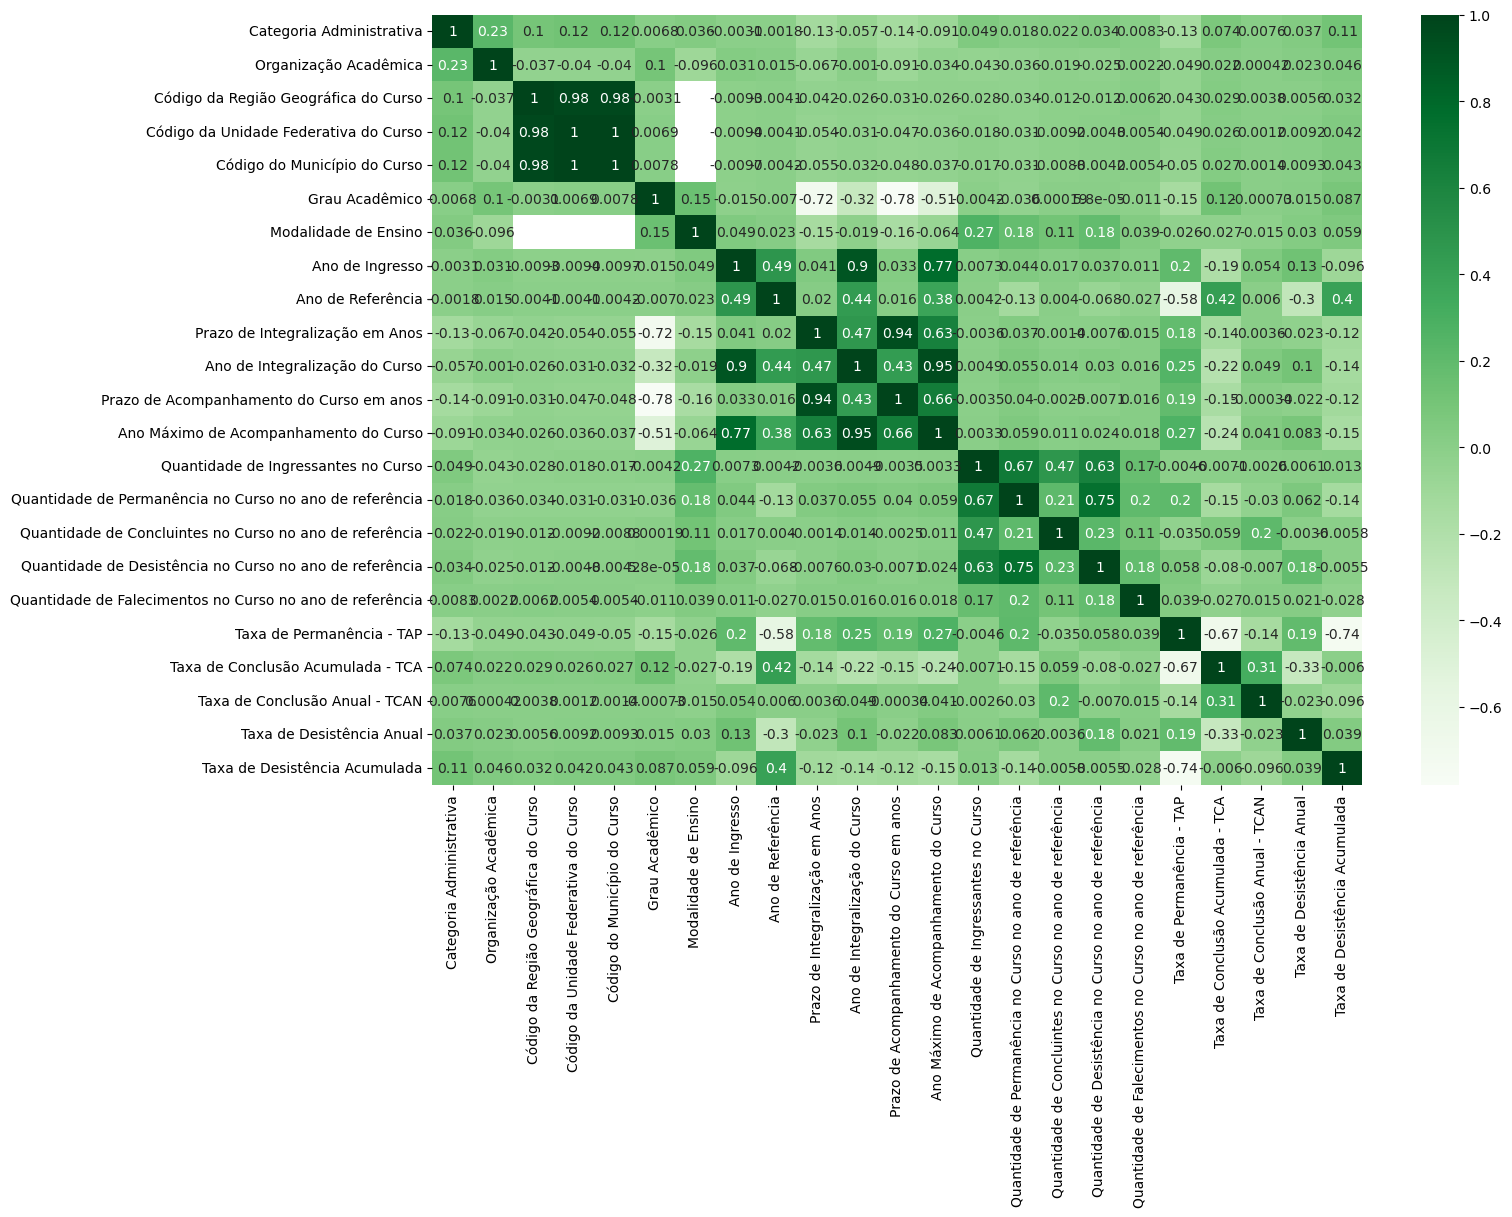

In [20]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_cursos.corr(), annot=True, cmap='Greens')

#### Heatmap dos indicadores de trajetória da educação superior

<Axes: >

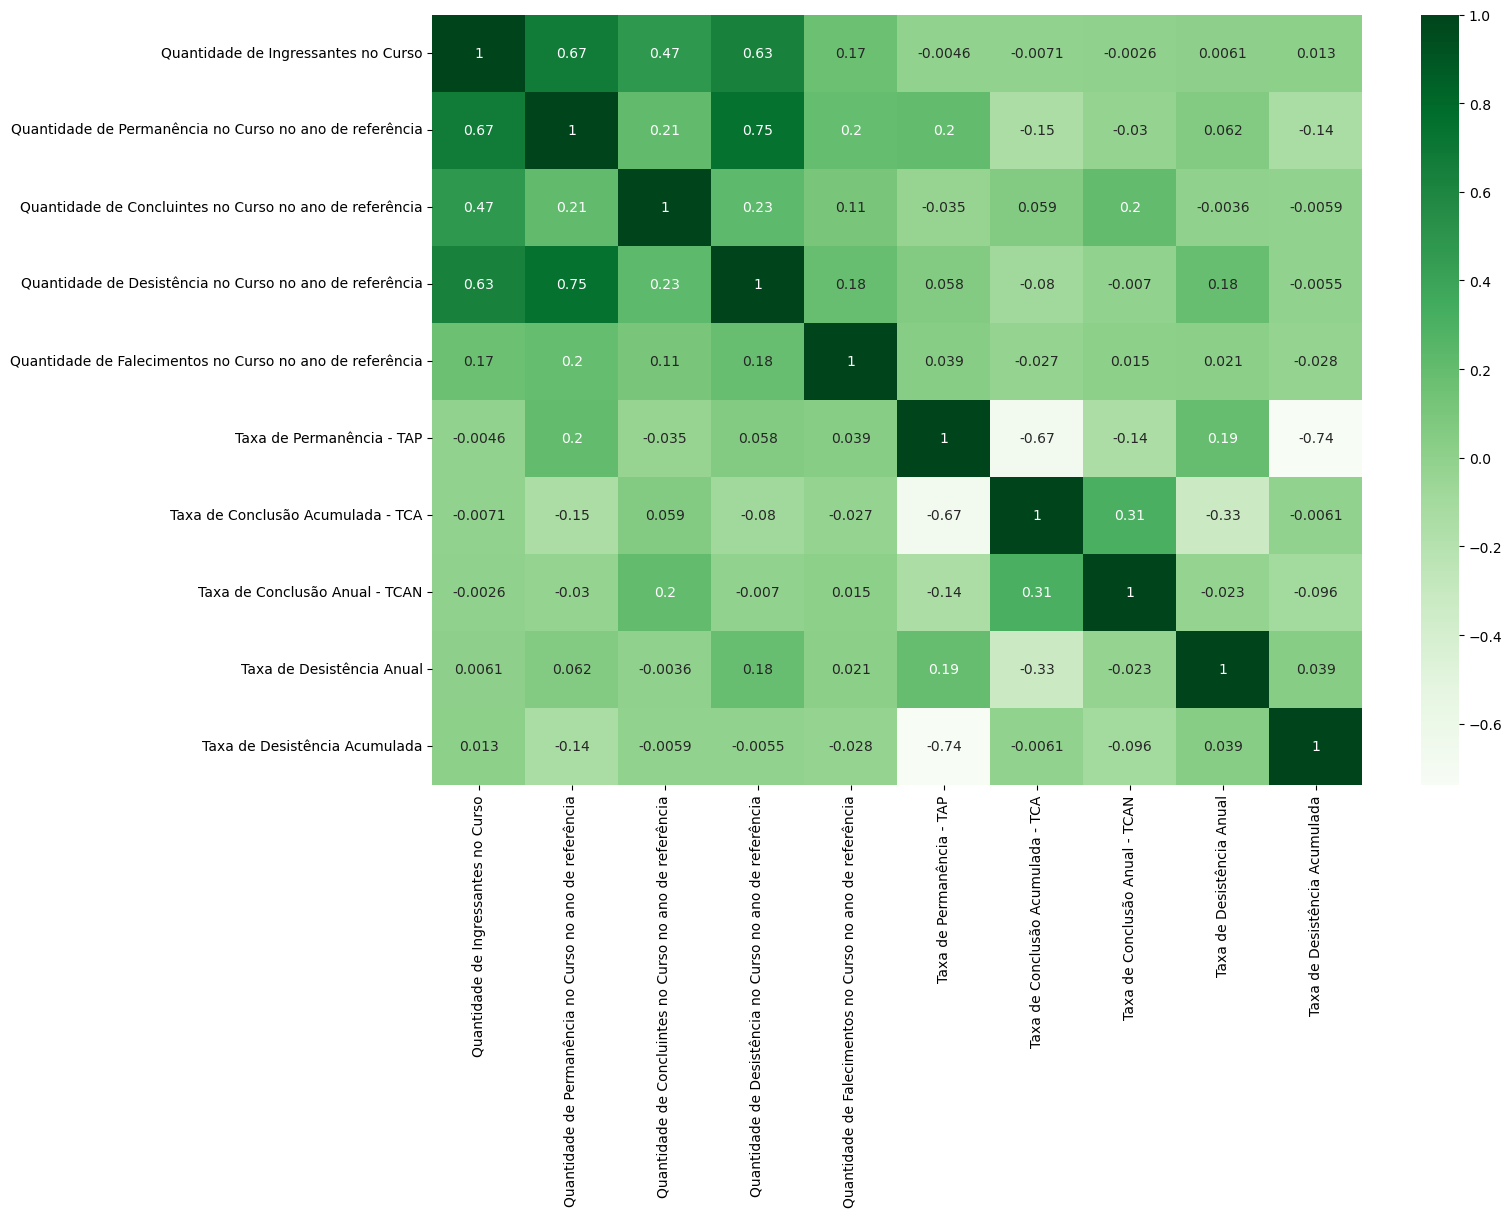

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_taxas.corr(), annot=True, cmap='Greens')

In [22]:
for colcursos in df_taxas.columns:
    print(colcursos)

Quantidade de Ingressantes no Curso
Quantidade de Permanência no Curso no ano de referência
Quantidade de Concluintes no Curso no ano de referência
Quantidade de Desistência no Curso no ano de referência
Quantidade de Falecimentos no Curso no ano de referência
Taxa de Permanência - TAP
Taxa de Conclusão Acumulada - TCA
Taxa de Conclusão Anual - TCAN
Taxa de Desistência Anual
Taxa de Desistência Acumulada


In [23]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)
    
def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.histplot(coluna, kde="hist")

def grafico_barra(coluna):  
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    ax.set_xlim(limites(coluna))

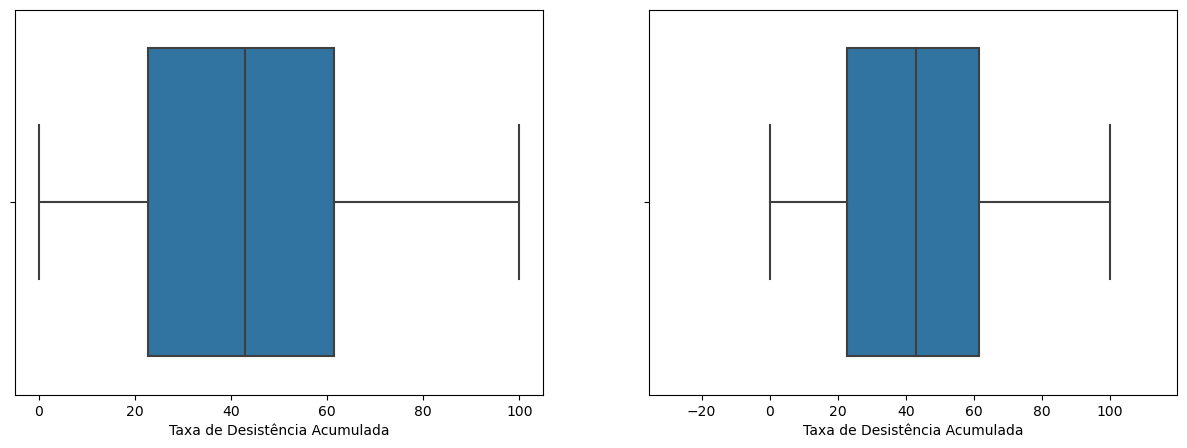

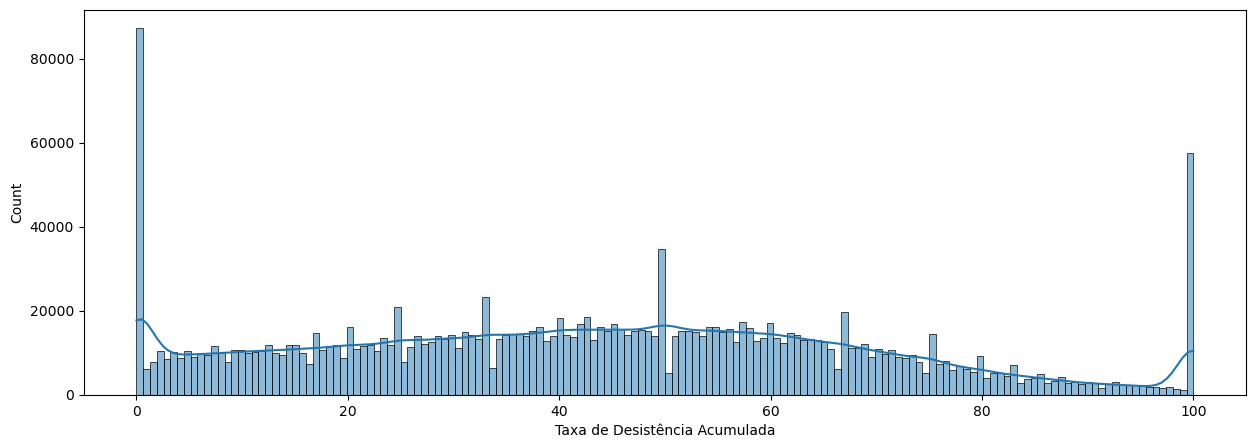

In [24]:
diagrama_caixa(df_taxas["Taxa de Desistência Acumulada"])
histograma(df_taxas["Taxa de Desistência Acumulada"])

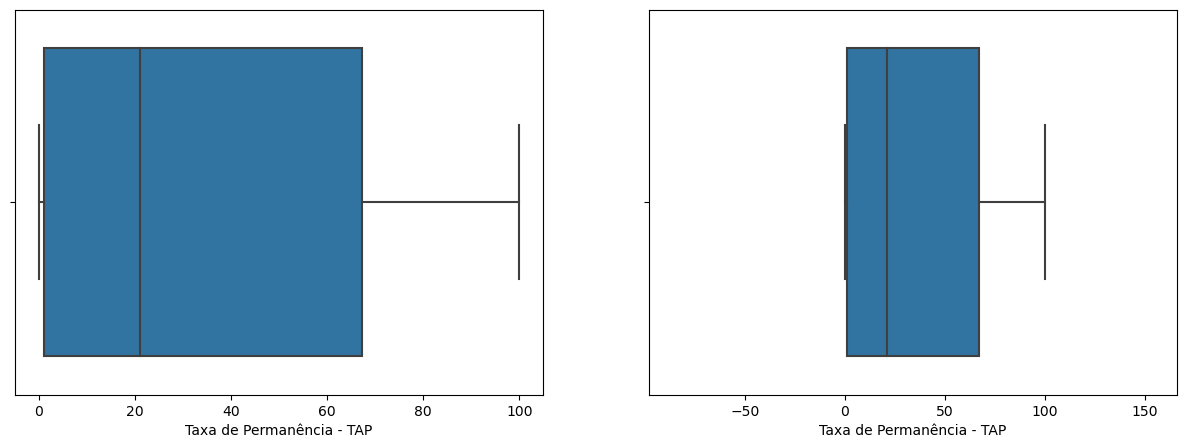

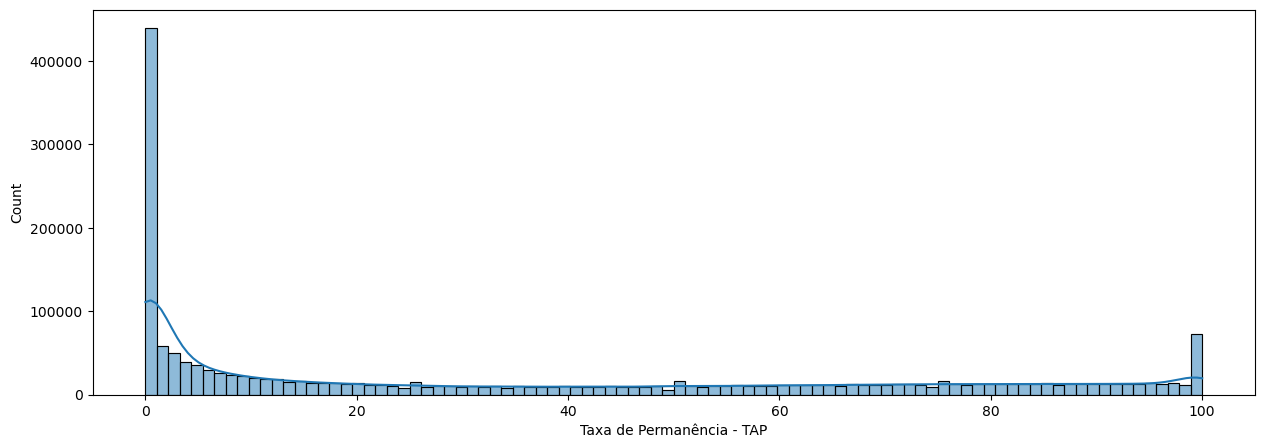

In [25]:
diagrama_caixa(df_taxas["Taxa de Permanência - TAP"])
histograma(df_taxas["Taxa de Permanência - TAP"])

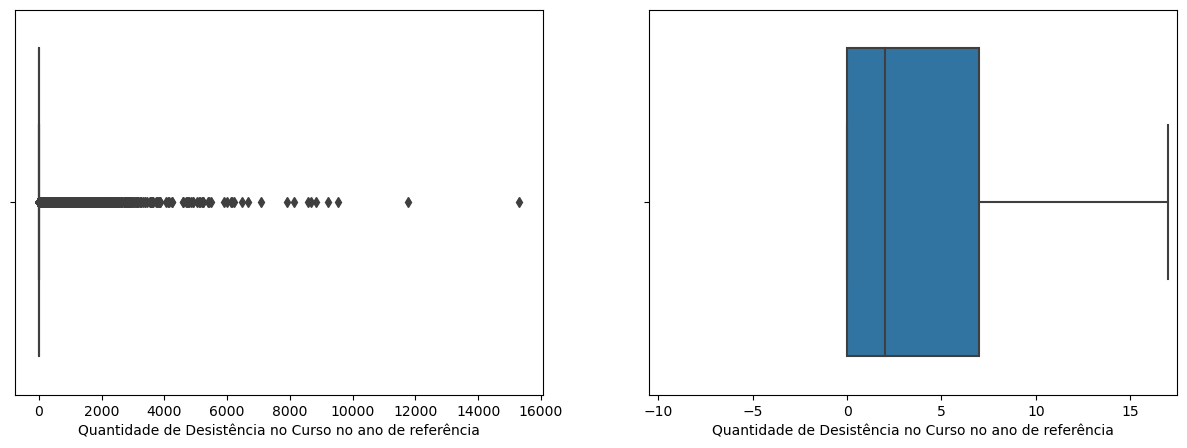

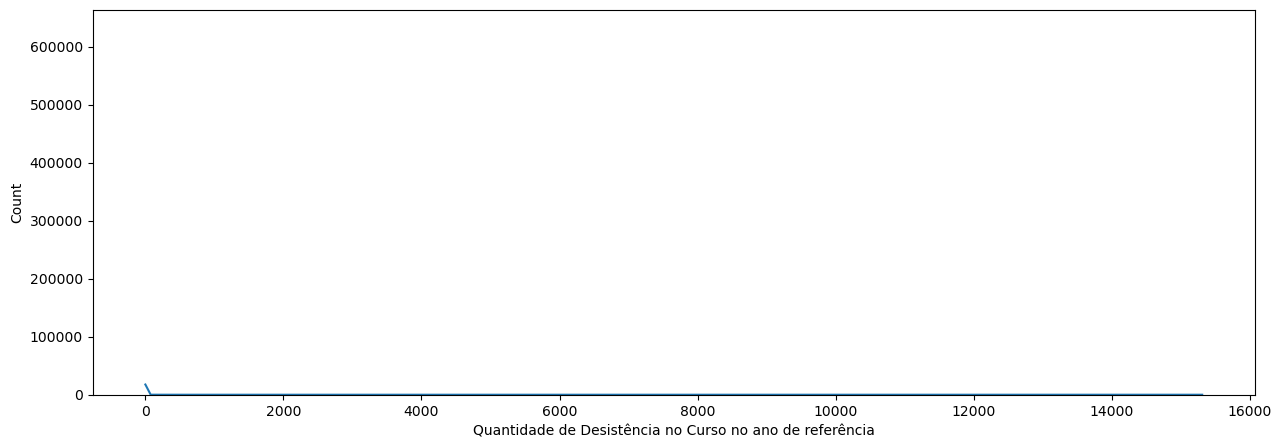

In [26]:
diagrama_caixa(df_taxas["Quantidade de Desistência no Curso no ano de referência"])
histograma(df_taxas["Quantidade de Desistência no Curso no ano de referência"])

,Mean,Std,Q1,Median,Q3,Max,Min
Quantidade de Ingressantes no Curso,106.279297,391.625188,33.0,58.0,104.0,35579.0,4.0
Quantidade de Permanência no Curso no ano de referência,36.320333,168.995148,1.0,11.0,39.0,26907.0,0.0
Quantidade de Concluintes no Curso no ano de referência,4.840624,40.932018,0.0,0.0,3.0,10957.0,0.0
Quantidade de Desistência no Curso no ano de referência,7.740926,50.211960,0.0,2.0,7.0,15309.0,0.0
Quantidade de Falecimentos no Curso no ano de referência,0.005319,0.080598,0.0,0.0,0.0,14.0,0.0


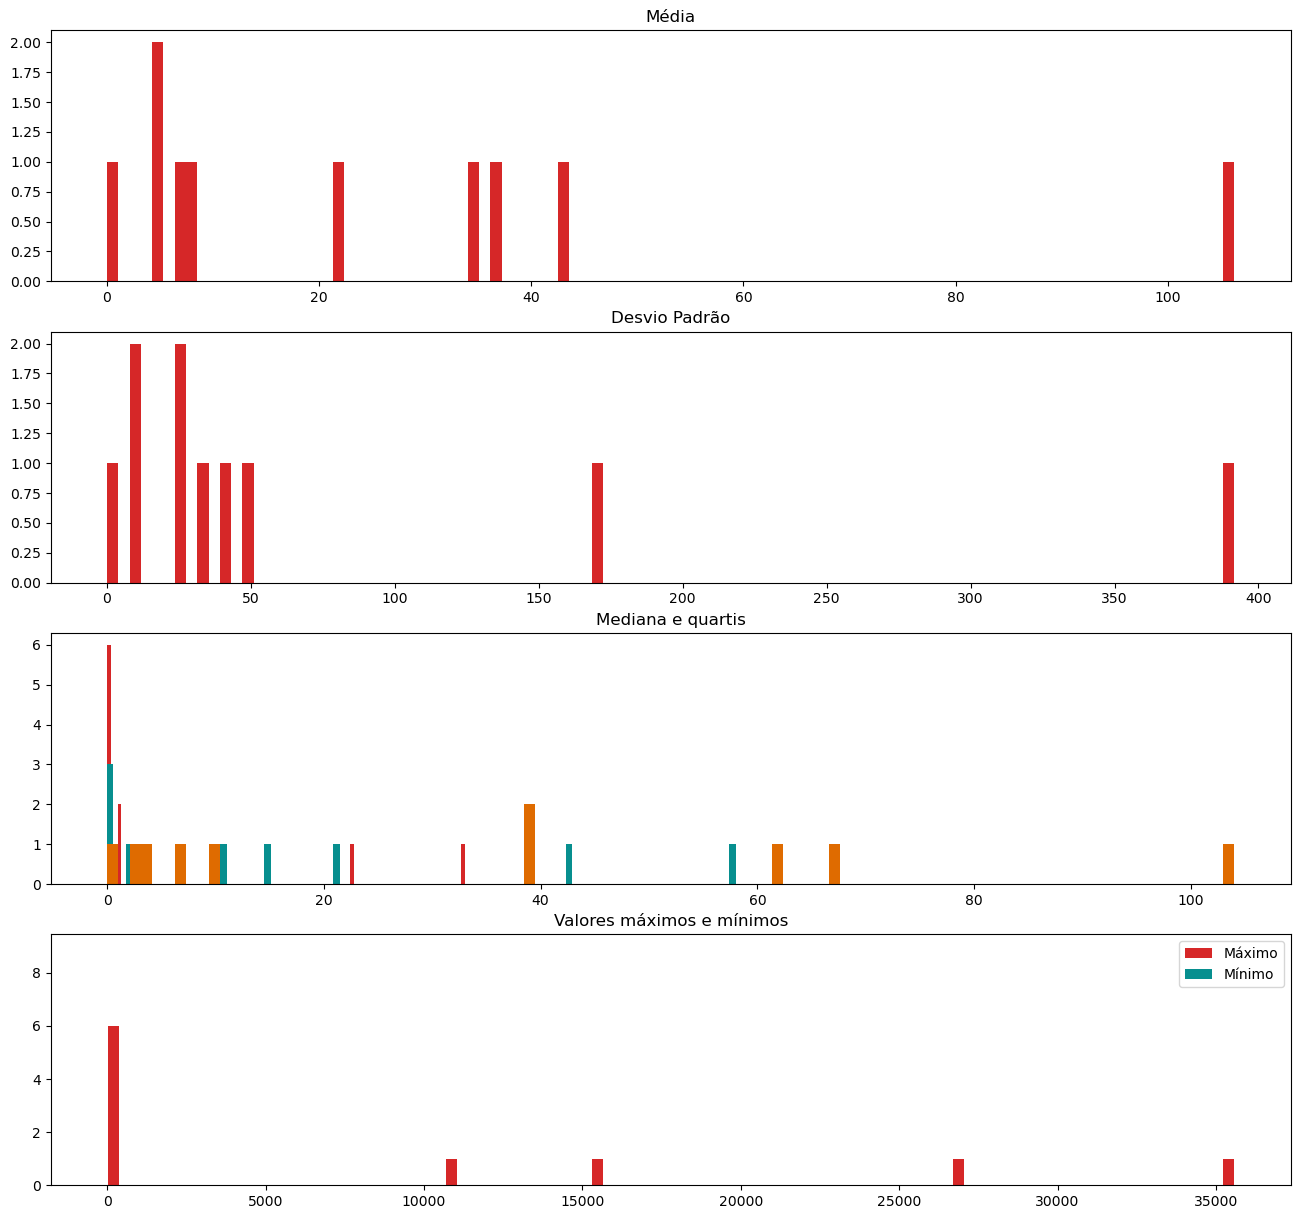

In [104]:
def descriptive_measures(values):
    return pd.Series([
        values.mean(), values.std(),
        values.quantile(0.25), values.median(), values.quantile(0.75),
        values.max(), values.min()
    ], index=['Mean', 'Std', 'Q1', 'Median', 'Q3', 'Max', 'Min'])

# Calcula as medidas descritivas
df_measures = df_taxas.apply(descriptive_measures, axis=0).transpose()
display(df_measures.head(5))

# Exibe as medidas graficamente
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(16, 15))
ax[0].hist(df_measures['Mean'].values, bins=100, color='#D62728')
ax[0].set_title('Média')
ax[1].hist(df_measures['Std'].values, bins=100, color='#D62728')
ax[1].set_title('Desvio Padrão')
ax[2].hist(df_measures['Q1'].values, bins=100, label='Q1', color='#D62728')
ax[2].hist(df_measures['Median'].values, bins=100, label='Mediana', color='#078F8F')
ax[2].hist(df_measures['Q3'].values, bins=100, label='Q3', color='#DF6B00')
ax[2].set_title('Mediana e quartis')
ax[3].hist(df_measures['Max'].values, bins=100, label='Máximo', color='#D62728')
ax[3].hist(df_measures['Min'].values, bins=100, label='Mínimo', color='#078F8F')
ax[3].legend()
ax[3].set_title('Valores máximos e mínimos')
plt.show()

In [ ]:
def normalizar(X):
    """
    Normaliza os atributos em X
    
    Esta função retorna uma versao normalizada de X onde o valor da
    média de cada atributo é igual a 0 e desvio padrao é igual a 1. Trata-se de
    um importante passo de pré-processamento quando trabalha-se com 
    métodos de aprendizado de máquina.
    """
    
    m, n = X.shape # m = qtde de objetos e n = qtde de atributos por objeto
    
    # Incializa as variaves de saída
    X_norm = np.random.rand(m,n) # inicializa X_norm com valores aleatórios
    mu = 0 # inicializa a média
    sigma = 1 # inicializa o desvio padrão
     
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    
    for i in range(m):
        X_norm[i,:] = (X[i,:]-mu) / sigma
        
    
    return X_norm, mu, sigma


# coloca os valores dos atributos na variável X
X = df_cursos.iloc[:,0:-1].values

# chama a função para normalizar X
X_norm, mu, sigma = normalizar(X)

df_cursos.iloc[:,0:-1] = X_norm

print('\nPrimeira amostra da base antes da normalização: [%2.4f %2.4f].' %(X[0,0],X[0,1]))
print('\nApós a normalização, espera-se que a primeira amostra seja igual a: [-0.5747 0.1804].')
print('\nPrimeira amostra da base apos normalização: [%2.4f %2.4f].' %(X_norm[0,0],X_norm[0,1]))

## TESTE CÓDIGOS